## Import Data


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import pandas as pd
data = pd.read_csv('/Users/muhammadzuamaalamin/Documents/Matkuls2/KK/AirQualityUCI.csv',sep=';')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [23]:
data = data.drop(columns = ['CO(GT)','C6H6(GT)','Date','Unnamed: 16','Unnamed: 15','AH','RH','T','Time'])


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PT08.S1(CO)    9357 non-null   float64
 1   NMHC(GT)       9357 non-null   float64
 2   PT08.S2(NMHC)  9357 non-null   float64
 3   NOx(GT)        9357 non-null   float64
 4   PT08.S3(NOx)   9357 non-null   float64
 5   NO2(GT)        9357 non-null   float64
 6   PT08.S4(NO2)   9357 non-null   float64
 7   PT08.S5(O3)    9357 non-null   float64
dtypes: float64(8)
memory usage: 592.1 KB


In [25]:
data.isnull().sum()

PT08.S1(CO)      114
NMHC(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
dtype: int64

In [26]:
data.isna().sum()

PT08.S1(CO)      114
NMHC(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
dtype: int64

In [12]:
data.duplicated().sum()

140

In [27]:
data = data.dropna()
data = data.drop_duplicates()
data.duplicated().sum()

0

In [28]:
data.describe(

)

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
count,9312.000000,9312.000000,9312.000000,9312.000000,9312.000000,9312.000000,9312.000000,9312.000000
mean,1055.025773,-158.892397,899.884880,170.309708,799.798432,59.307775,1399.170425,980.750537
std,318.966468,140.097481,334.574153,256.853157,315.235023,126.053992,455.016567,450.661712
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,923.000000,-200.000000,713.750000,51.000000,640.000000,54.000000,1189.000000,703.000000
50%,1054.000000,-200.000000,896.000000,142.000000,796.000000,97.000000,1448.000000,944.000000
75%,1222.000000,-200.000000,1106.000000,285.250000,961.000000,133.000000,1663.000000,1257.000000
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000


In [29]:
## cek data Oulier

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_indices = data[(data < lower_bound) | (data > upper_bound)].dropna(how='all').index
print(f"Number of potential outliers detected: {len(outlier_indices)}")

Number of potential outliers detected: 3418


In [30]:
## Hapus data Oulier
data_cleaned_looped = data.copy() # Create a copy to avoid modifying the original data

while True:
    Q1 = data_cleaned_looped.quantile(0.25)
    Q3 = data_cleaned_looped.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_indices = data_cleaned_looped[(data_cleaned_looped < lower_bound) | (data_cleaned_looped > upper_bound)].dropna(how='all').index

    if len(outlier_indices) == 0:
        print("No more outliers detected.")
        break
    else:
        print(f"Removing {len(outlier_indices)} potential outliers.")
        data_cleaned_looped = data_cleaned_looped.drop(outlier_indices)

print(f"Number of rows after removing outliers iteratively: {len(data_cleaned_looped)}")
display(data_cleaned_looped.head())

Removing 3418 potential outliers.
Removing 170 potential outliers.
Removing 90 potential outliers.
Removing 67 potential outliers.
Removing 35 potential outliers.
Removing 27 potential outliers.
Removing 12 potential outliers.
Removing 11 potential outliers.
Removing 1 potential outliers.
Removing 1 potential outliers.
No more outliers detected.
Number of rows after removing outliers iteratively: 5480


,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
185,1473.0,-200.0,1127.0,224.0,831.0,152.0,1752.0,1568.0
186,1379.0,-200.0,1068.0,171.0,899.0,139.0,1663.0,1374.0
187,1385.0,-200.0,1056.0,149.0,891.0,133.0,1648.0,1268.0
188,1379.0,-200.0,1087.0,137.0,901.0,126.0,1660.0,1144.0
189,1322.0,-200.0,1129.0,149.0,934.0,128.0,1639.0,1109.0


In [31]:
data_cleaned_looped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5480 entries, 185 to 9356
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PT08.S1(CO)    5480 non-null   float64
 1   NMHC(GT)       5480 non-null   float64
 2   PT08.S2(NMHC)  5480 non-null   float64
 3   NOx(GT)        5480 non-null   float64
 4   PT08.S3(NOx)   5480 non-null   float64
 5   NO2(GT)        5480 non-null   float64
 6   PT08.S4(NO2)   5480 non-null   float64
 7   PT08.S5(O3)    5480 non-null   float64
dtypes: float64(8)
memory usage: 385.3 KB


In [ ]:
# from sklearn.preprocessing import StandardScaler

# # Dataframe kamu: data_cleaned
# features = ["PM2.5 (ug/m3)", "PM10 (ug/m3)", "CO2 (ppm)", "Temperature (Celsius)", "Temperature (Fahrenheit)", "Humidity (%)"]


<Axes: >

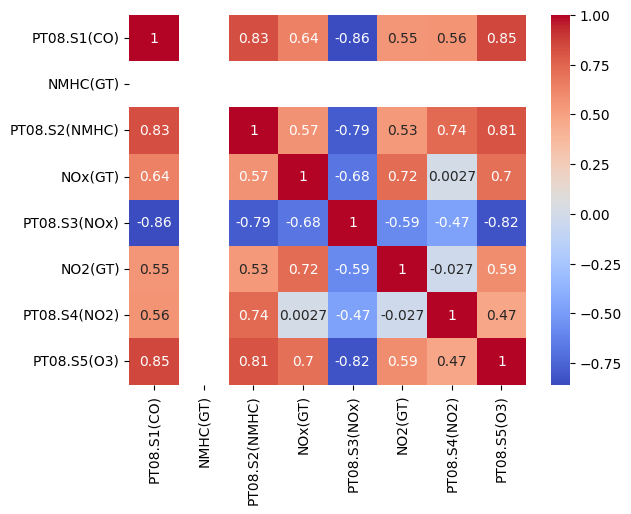

In [32]:
## Heatmap Data
import seaborn as sns
sns.heatmap(data_cleaned_looped.corr(), annot=True, cmap='coolwarm')

# Prepocessing

In [33]:
from sklearn.model_selection import train_test_split

# Asumsikan data_cleaned_looped adalah data numerik yang sudah dibersihkan
X = data_cleaned_looped.copy()

# Split sebelum apa pun!
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42, stratify=None)

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # FIT HANYA DI SINI
X_test_scaled = scaler.transform(X_test)         # HANYA TRANSFORM, TIDAK FIT

Clustering progress:  11%|█         | 1/9 [00:00<00:04,  1.76it/s]

k=2, Silhouette Score=0.3687


Clustering progress:  22%|██▏       | 2/9 [00:01<00:04,  1.66it/s]

k=3, Silhouette Score=0.2804


Clustering progress:  33%|███▎      | 3/9 [00:01<00:03,  1.87it/s]

k=4, Silhouette Score=0.2994


Clustering progress:  44%|████▍     | 4/9 [00:02<00:03,  1.64it/s]

k=5, Silhouette Score=0.2861


Clustering progress:  56%|█████▌    | 5/9 [00:03<00:02,  1.52it/s]

k=6, Silhouette Score=0.2616


Clustering progress:  67%|██████▋   | 6/9 [00:04<00:02,  1.36it/s]

k=7, Silhouette Score=0.2588


Clustering progress:  78%|███████▊  | 7/9 [00:04<00:01,  1.38it/s]

k=8, Silhouette Score=0.2479


Clustering progress:  89%|████████▉ | 8/9 [00:05<00:00,  1.26it/s]

k=9, Silhouette Score=0.2225


Clustering progress: 100%|██████████| 9/9 [00:06<00:00,  1.37it/s]

k=10, Silhouette Score=0.2259


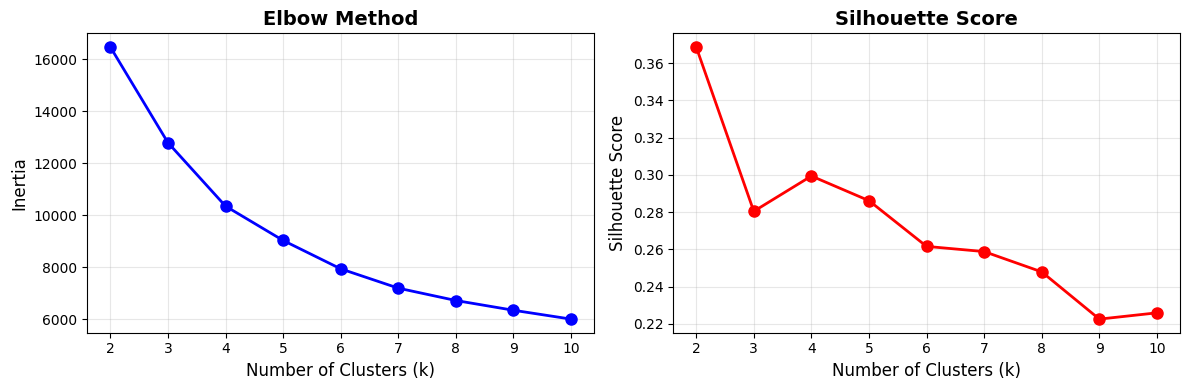

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from tqdm import tqdm

inertias = []
sil_scores = []
K_range = range(2, 11)

# Loop untuk setiap nilai k
for k in tqdm(K_range, desc="Clustering progress"):
    # Latih K-Means pada data yang sudah di-scale
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_temp = kmeans_temp.fit_predict(X_train_scaled)
    
    # Simpan inertia
    inertias.append(kmeans_temp.inertia_)
    
    # Hitung Silhouette Score pada data yang SAMA (X_train_scaled)
    sil_score = silhouette_score(X_train_scaled, labels_temp)
    sil_scores.append(sil_score)
    
    # Print hasil untuk setiap k
    print(f"k={k}, Silhouette Score={sil_score:.4f}")

# Plot hasil
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot Elbow Method
ax[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
ax[0].set_title('Elbow Method', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Number of Clusters (k)', fontsize=12)
ax[0].set_ylabel('Inertia', fontsize=12)
ax[0].grid(True, alpha=0.3)

# Plot Silhouette Score
ax[1].plot(K_range, sil_scores, 'ro-', linewidth=2, markersize=8)
ax[1].set_title('Silhouette Score', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Number of Clusters (k)', fontsize=12)
ax[1].set_ylabel('Silhouette Score', fontsize=12)
ax[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [37]:
# === 5. Pilih jumlah cluster, misal k=3 ===
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_train_scaled) # HANYA FIT PADA TRAIN

KMeans(n_clusters=2, n_init=10, random_state=42)

In [38]:
# Assign cluster ke Train & Test
train_clusters = kmeans.predict(X_train_scaled)
test_clusters = kmeans.predict(X_test_scaled)   # HANYA PREDICT, TIDAK FIT

         PT08.S1(CO)  NMHC(GT)  PT08.S2(NMHC)     NOx(GT)  PT08.S3(NOx)  \
Cluster                                                                   
0        1186.664410    -200.0    1070.216634  284.223888    676.182302   
1         942.100173    -200.0     752.674007  121.319516    948.475389   

            NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  
Cluster                                         
0        131.287234   1558.483559  1211.542553  
1         83.476684   1269.082038   742.950345  


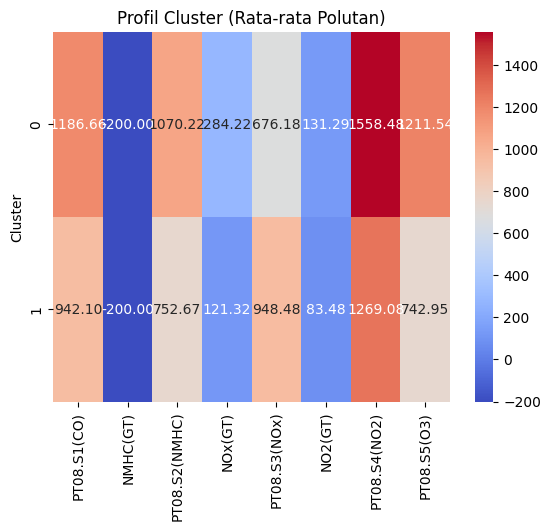

In [39]:
# Tambahkan ke dataframe
X_train["Cluster"] = train_clusters
X_test["Cluster"] = test_clusters

# === 6. Profil cluster ===
cluster_profile = X_train.groupby("Cluster").mean()
print(cluster_profile)

sns.heatmap(cluster_profile, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Profil Cluster (Rata-rata Polutan)")
plt.show()

In [40]:
# === 1. Jumlah data per cluster ===
print("Jumlah data per cluster:")
print(pd.Series(train_clusters).value_counts())

Jumlah data per cluster:
1    2316
0    2068
Name: count, dtype: int64


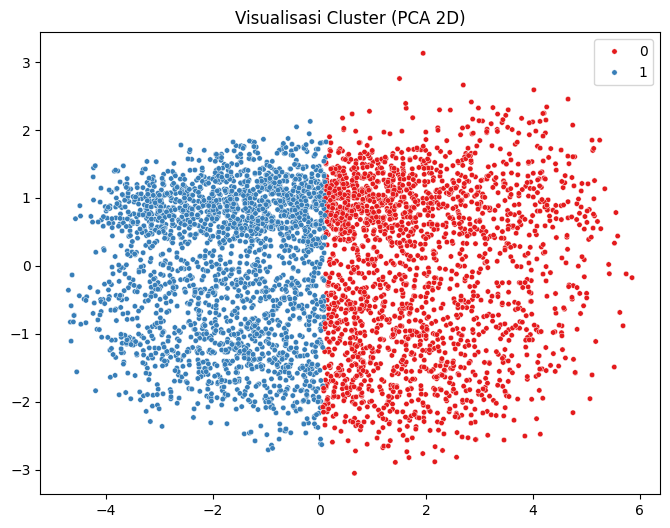

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
# === 2. Scatterplot cluster (PCA 2D) ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=train_clusters, palette="Set1", s=15)
plt.title("Visualisasi Cluster (PCA 2D)")
plt.show()

In [42]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Evaluate clustering performance
# Silhouette Score: Higher value means better defined clusters (range -1 to 1)
silhouette_avg = silhouette_score(X_train_scaled, train_clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Davies-Bouldin Index: Lower value means better clustering (0 indicates perfect separation)
db_index = davies_bouldin_score(X_train_scaled, train_clusters)
print(f"Davies-Bouldin Index: {db_index}")

Silhouette Score: 0.36868126565788284
Davies-Bouldin Index: 1.0320494575543429


In [43]:
# Gabungkan kembali train dan test yang sudah di-scale
import numpy as np

X_final = np.vstack([X_train_scaled, X_test_scaled])  # Gabung array
y_final = np.hstack([train_clusters, test_clusters])   # Gabung label cluster

In [44]:

# === 3. Siapkan data untuk klasifikasi ===

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42, stratify=y_final
)



=== Random Forest ===
Accuracy: 0.9744525547445255
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       523
           1       0.98      0.97      0.98       573

    accuracy                           0.97      1096
   macro avg       0.97      0.97      0.97      1096
weighted avg       0.97      0.97      0.97      1096



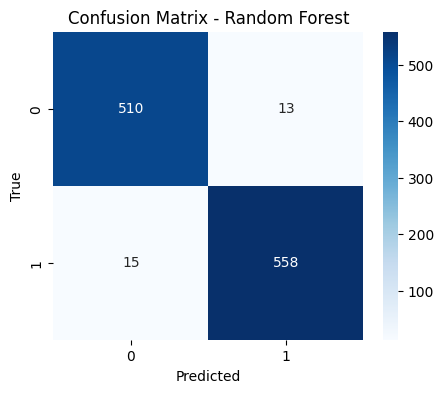


=== SVM ===
Accuracy: 0.9917883211678832
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       523
           1       0.99      0.99      0.99       573

    accuracy                           0.99      1096
   macro avg       0.99      0.99      0.99      1096
weighted avg       0.99      0.99      0.99      1096



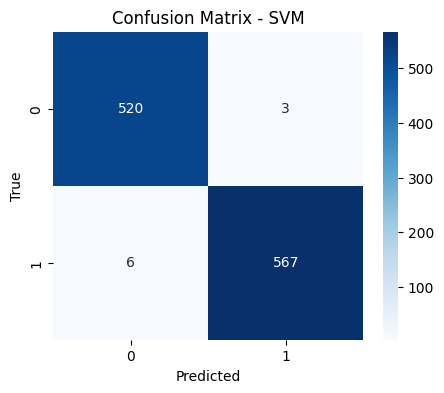


=== KNN ===
Accuracy: 0.9826642335766423
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       523
           1       0.99      0.98      0.98       573

    accuracy                           0.98      1096
   macro avg       0.98      0.98      0.98      1096
weighted avg       0.98      0.98      0.98      1096



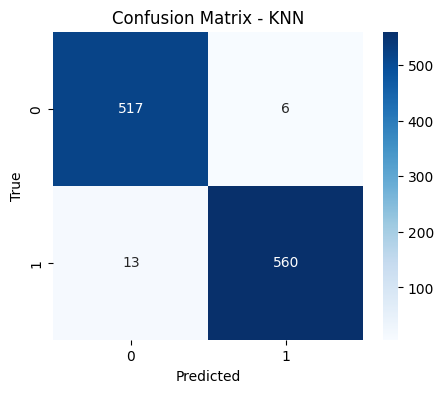


=== Naive Bayes ===
Accuracy: 0.9844890510948905
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       523
           1       1.00      0.97      0.98       573

    accuracy                           0.98      1096
   macro avg       0.98      0.98      0.98      1096
weighted avg       0.98      0.98      0.98      1096



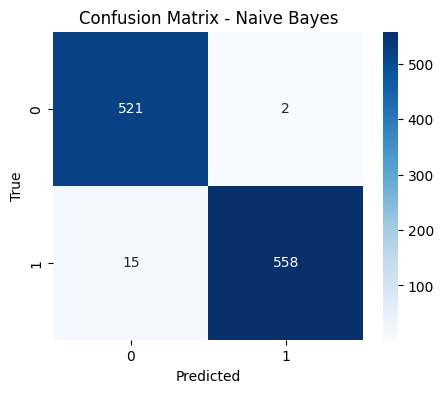


=== Decition Tree ===
Accuracy: 0.958941605839416
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       523
           1       0.96      0.96      0.96       573

    accuracy                           0.96      1096
   macro avg       0.96      0.96      0.96      1096
weighted avg       0.96      0.96      0.96      1096



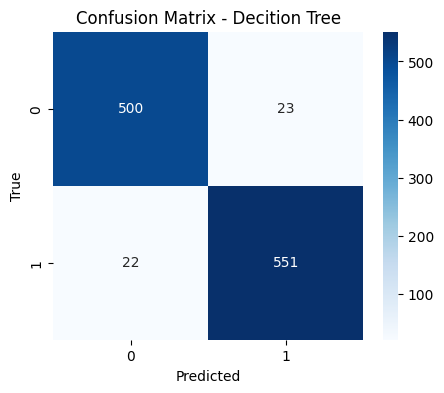

In [45]:
from sklearn.tree import DecisionTreeClassifier
# === 4. Definisi model ===
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decition Tree": DecisionTreeClassifier(random_state=42),
}

# === 5. Training & Evaluasi ===
for name, model in models.items():
    model.fit(X_train_cls, y_train_cls)
    y_pred = model.predict(X_test_cls)
    
    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_test_cls, y_pred))
    print(classification_report(y_test_cls, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test_cls, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()